In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

C:\Users\meakh\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meakh\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meakh\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meakh\AppData\Roaming\Python\Python37\site-

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
encoding_dim = 32
input_img = Input(shape = (784,))
encoded = Dense(encoding_dim, activation= 'relu')(input_img)
decoded = Dense(784, activation= 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [18]:
encoder = Model(input_img, encoded)

In [19]:
encoded_input = Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [20]:
autoencoder.compile(optimizer= 'adadelta', loss = 'categorical_crossentropy')

In [21]:
import numpy as np

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [23]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical( y_test)

In [26]:
autoencoder.fit(X_train, X_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 29us/sample - loss: 2.6772 - val_loss: 2.7152
Epoch 2/50
60000/60000 [==============================] - 1s 25us/sample - loss: 2.6772 - val_loss: 2.7151
Epoch 3/50
60000/60000 [==============================] - 1s 25us/sample - loss: 2.6772 - val_loss: 2.7151
Epoch 4/50
60000/60000 [==============================] - ETA: 0s - loss: 2.6774- ETA: 0s - loss: 2.6 - 2s 25us/sample - loss: 2.6771 - val_loss: 2.7151
Epoch 5/50
60000/60000 [==============================] - 2s 25us/sample - loss: 2.6771 - val_loss: 2.7151
Epoch 6/50
60000/60000 [==============================] - 2s 26us/sample - loss: 2.6771 - val_loss: 2.7151
Epoch 7/50
60000/60000 [==============================] - 2s 25us/sample - loss: 2.6771 - val_loss: 2.7150
Epoch 8/50
60000/60000 [==============================] - 2s 26us/sample - loss: 2.6770 - val_loss: 2.7150
Epoch 9/50
60000/60000 [========================

In [27]:
encoded_img = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_img)

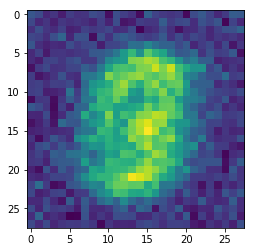

In [28]:
import matplotlib.pyplot as plt
plt.imshow(decoded_img[0].reshape(28,28))

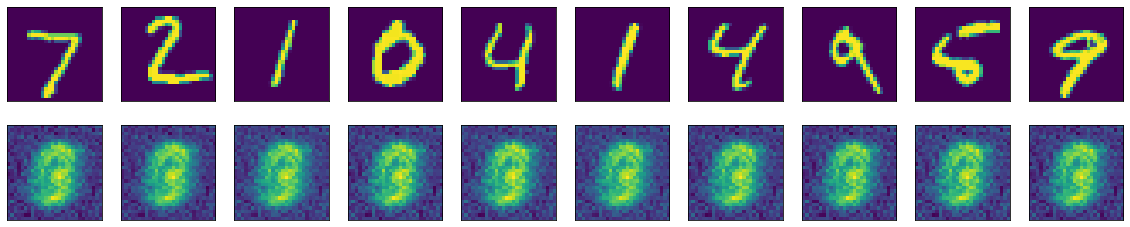

In [30]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [2]:
import math
def scheduler(epoch,lr):
        return lr*math.exp(-0.1)
    
lr_call = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [3]:
lr_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor = 0.05, verbose=2)

In [9]:
encoding_dim = 32
input_img = Input(shape = (784,))
encoded = Dense(128, activation= 'relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)

decoded = Dense(64, activation= 'relu')(encoded)
decoded= Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder1 = Model(input_img, decoded)

autoencoder1.compile(optimizer= 'adadelta', loss = 'mse')

with tf.device('/gpu:0'):
    autoencoder1.fit(X_train, X_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (X_test, X_test),
               callbacks = [lr_call, lr_plat])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2310 - val_loss: 0.2311
Epoch 2/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2310 - val_loss: 0.2311
Epoch 3/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2310 - val_loss: 0.2310
Epoch 4/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2309 - val_loss: 0.2310
Epoch 5/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2309 - val_loss: 0.2310
Epoch 6/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2309 - val_loss: 0.2310
Epoch 7/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2309 - val_loss: 0.2310
Epoch 8/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2309 - val_loss: 0.2310
Epoch 9/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2309 - val_

In [13]:
decoded = autoencoder1.predict(X_test)

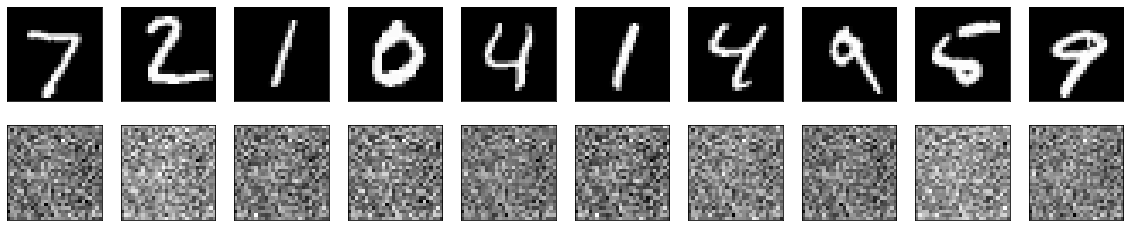

In [15]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
model = Sequential()
model.add(Dense(784, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(784, activation = 'sigmoid'))


In [17]:
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(X_train, X_train,
         epochs = 25,
         verbose = 1,
         batch_size = 256,
         validation_data = (X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0596 - val_loss: 0.0335
Epoch 2/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0347 - val_loss: 0.0268
Epoch 3/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0314 - val_loss: 0.0242
Epoch 4/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0296 - val_loss: 0.0222
Epoch 5/25
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0283 - val_loss: 0.0215
Epoch 6/25
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0274 - val_loss: 0.0207
Epoch 7/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0266 - val_loss: 0.0202
Epoch 8/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0260 - val_loss: 0.0193
Epoch 9/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0255 - val_

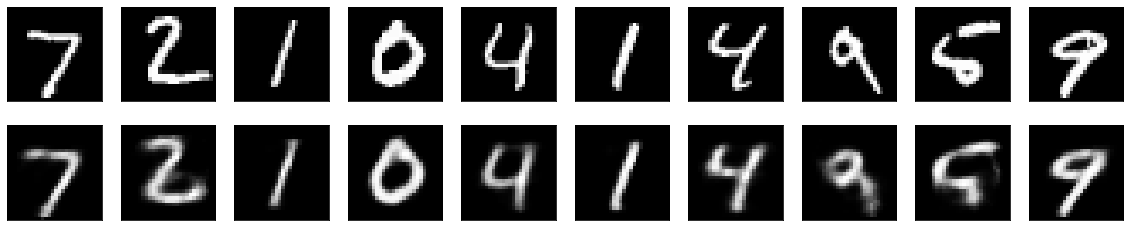

In [18]:
decoded = model.predict(X_test)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
model.save('autoencoder')